In [1]:
# (1) 필요한 모듈 import하기

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# (2) from sklearn.datasets import load_digits

from sklearn.datasets import load_digits

digits = load_digits()
print(dir(digits))
print(digits.data.shape)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
(1797, 64)


In [3]:
# 이번 데이터셋은 (8,8) 배열을 (64, )배열로 바꾸어야 문제가 풀린다 

x, y = digits.images, digits.target
print('reshape 전 x shape:', x.shape)

n_samples = len(digits.images)
x = x.reshape((n_samples, -1))
print('reshape 후 x shape:', x.shape)

reshape 전 x shape: (1797, 8, 8)
reshape 후 x shape: (1797, 64)


In [4]:
# (3) 데이터 이해하기

print(y)
print(x.shape) 
print(x[0])

[0 1 2 ... 8 9 8]
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

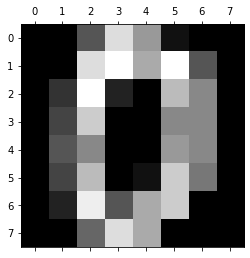

In [5]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [6]:
# (4) train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


In [7]:
# (5) 다양한 모델로 학습시켜보기

# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.73      0.84      0.78        55
           2       0.84      0.92      0.88        53
           3       0.70      0.77      0.73        52
           4       0.91      0.86      0.88        58
           5       0.88      0.94      0.91        48
           6       1.00      0.96      0.98        48
           7       0.78      0.78      0.78        49
           8       0.93      0.69      0.80        62
           9       0.81      0.80      0.80        54

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540



In [8]:
# Randcom Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.93      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        52
           4       0.92      0.98      0.95        58
           5       0.94      1.00      0.97        48
           6       1.00      0.96      0.98        48
           7       0.94      0.98      0.96        49
           8       1.00      0.89      0.94        62
           9       1.00      0.94      0.97        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [9]:
# SVM

from sklearn import svm

svm_model = svm.SVC(random_state=44)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        52
           4       0.98      1.00      0.99        58
           5       0.98      1.00      0.99        48
           6       1.00      1.00      1.00        48
           7       0.98      1.00      0.99        49
           8       1.00      0.95      0.98        62
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [10]:
# SGD

from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=10)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.97      0.69      0.81        55
           2       0.96      1.00      0.98        53
           3       0.96      0.92      0.94        52
           4       0.97      0.98      0.97        58
           5       0.91      1.00      0.95        48
           6       1.00      0.98      0.99        48
           7       0.94      0.98      0.96        49
           8       0.83      0.95      0.89        62
           9       0.91      0.93      0.92        54

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



In [11]:
# Lodistic Regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.94      0.89      0.92        55
           2       0.96      1.00      0.98        53
           3       0.96      0.94      0.95        52
           4       0.98      0.97      0.97        58
           5       0.82      0.98      0.90        48
           6       0.98      0.98      0.98        48
           7       0.96      1.00      0.98        49
           8       0.95      0.84      0.89        62
           9       0.94      0.93      0.93        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# 데이터가 Unbalanced 하지 않아서 accuracy를 써도 될 것 같습니다. 
